##FreeCodeCamp Cat and dog classification

In this FreeCodeCamp challenge, I developed a Convolutional Neural Network (CNN) capable of identifying whether an image depicts a dog or a cat with a 70% accuracy rate. In this notebook, I utilized the ImageDataGenerator to generate a 3-tensor for the training, validation, and test inputs. Additionally, by employing the flow_from_directory property, I generated additional examples for the training data to mitigate the risk of overfitting during the training process.

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

#Creating a subdirectory and moving all the image to it
# Create a subdirectory within test_dir
subdirectory_name = 'subdir'
subdirectory_path = os.path.join(test_dir, subdirectory_name)
os.makedirs(subdirectory_path, exist_ok=True)

# Move all content from test_dir to the subdirectory
for item in os.listdir(test_dir):
    item_path = os.path.join(test_dir, item)
    if os.path.isfile(item_path):
        shutil.move(item_path, os.path.join(subdirectory_path, item))


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOS

In [3]:
# 3
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_WIDTH,IMG_HEIGHT),
    batch_size = batch_size,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_WIDTH,IMG_HEIGHT),
    batch_size = batch_size,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    directory = '/content/cats_and_dogs/test',
    target_size = (IMG_WIDTH,IMG_HEIGHT),
    batch_size = batch_size,
    shuffle = False,
    class_mode=None
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


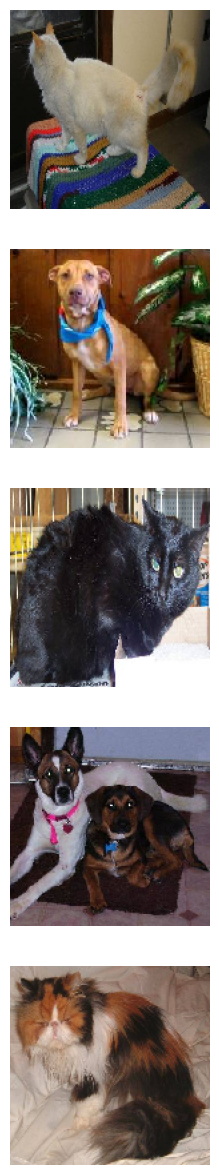

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
# 5
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,  featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


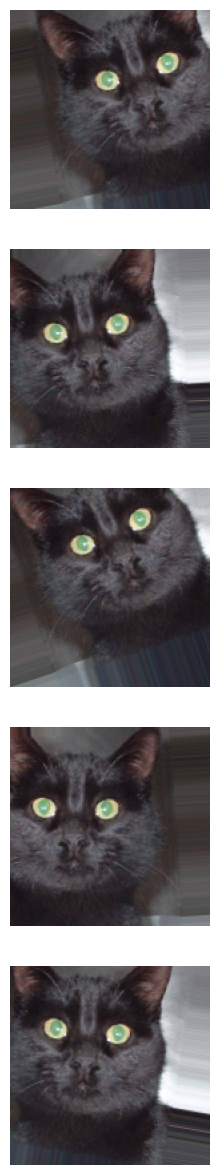

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
augmented_images[0].shape

(150, 150, 3)

In [8]:
# 7
model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (150,150,3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(2, activation="softmax"),
    ]

)


model.compile( optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'])






model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

In [9]:
# 8
history = model.fit(
    train_data_gen,epochs = epochs,validation_data= (val_data_gen),validation_steps=10
)

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 0.8271 - accuracy: 0.5130

16/16 [==============================] - 23s 1s/step - loss: 0.8271 - accuracy: 0.5130 - val_loss: 0.6908 - val_accuracy: 0.5140
Epoch 2/15
16/16 [==============================] - 14s 899ms/step - loss: 0.6831 - accuracy: 0.5435
Epoch 3/15
16/16 [==============================] - 14s 893ms/step - loss: 0.6703 - accuracy: 0.5790
Epoch 4/15
16/16 [==============================] - 14s 897ms/step - loss: 0.6506 - accuracy: 0.6270
Epoch 5/15
16/16 [==============================] - 15s 884ms/step - loss: 0.6334 - accuracy: 0.6390
Epoch 6/15
16/16 [==============================] - 15s 894ms/step - loss: 0.6356 - accuracy: 0.6430
Epoch 7/15
16/16 [==============================] - 14s 896ms/step - loss: 0.6250 - accuracy: 0.6440
Epoch 8/15
16/16 [==============================] - 14s 891ms/step - loss: 0.6040 - accuracy: 0.6955
Epoch 9/15
16/16 [==============================] - 14s 895ms/step - loss: 0.6060 - accuracy: 0.6760
Epoch 10/15
16/16 [==============================] - 14s 882ms/

ValueError: x and y must have same first dimension, but have shapes (15,) and (1,)

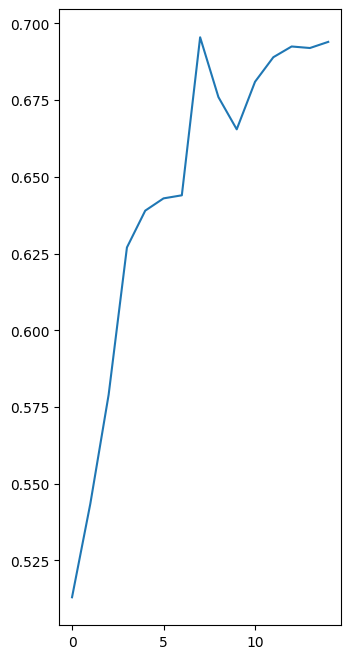

In [12]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
print(len(test_data_gen))

1


In [14]:
probabilities = model.predict(test_data_gen)

1/1 [==============================] - 1s 588ms/step


In [32]:
probabilities = probabilities[:,1]

In [33]:
print(probabilities)

[0.43620297 0.13660082 0.13011868 0.834007   0.4374211  0.35508138
 0.51089483 0.23772478 0.2974788  0.88734096 0.37424147 0.37872788
 0.4061062  0.08559844 0.50138766 0.71630675 0.6344824  0.8654203
 0.4005613  0.5214414  0.23301278 0.40263453 0.40924484 0.5276062
 0.59137625 0.47801378 0.8749147  0.41242942 0.37822133 0.60364497
 0.5213102  0.34306085 0.72607905 0.99937207 0.48412353 0.68378425
 0.97914356 0.81615084 0.34519032 0.39423296 0.34781417 0.35556895
 0.96531725 0.68335104 0.3721735  0.4458475  0.2918823  0.4464522
 0.1464017  0.48004258]


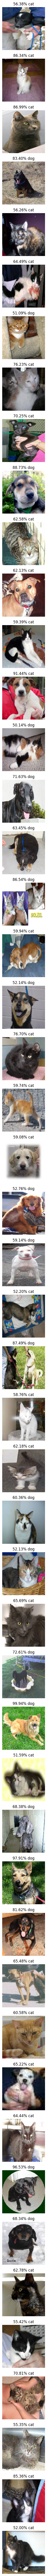

In [34]:
sample_test_images = next(test_data_gen)
plotImages(sample_test_images,probabilities)

In [36]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
